In [1]:
#Importing all the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skplt


In [2]:
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
#importing the dataset under study

df = pd.read_csv("C:/Users/Hp/Downloads/data.csv/data.csv")

In [4]:
#Display all the columns of the dataframe when printed
pd.set_option("display.max_columns", None)


In [28]:
df.head()
df.columns()

TypeError: 'Index' object is not callable

In [32]:
for col in df.columns:
    print(col)
    
    

Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

In [6]:
#Removing missing values from the frame
df.dropna()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [7]:
#viewing the column names in the dataframe

for name in df:
    print(name)

Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

In [8]:
#basic information of the variables in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

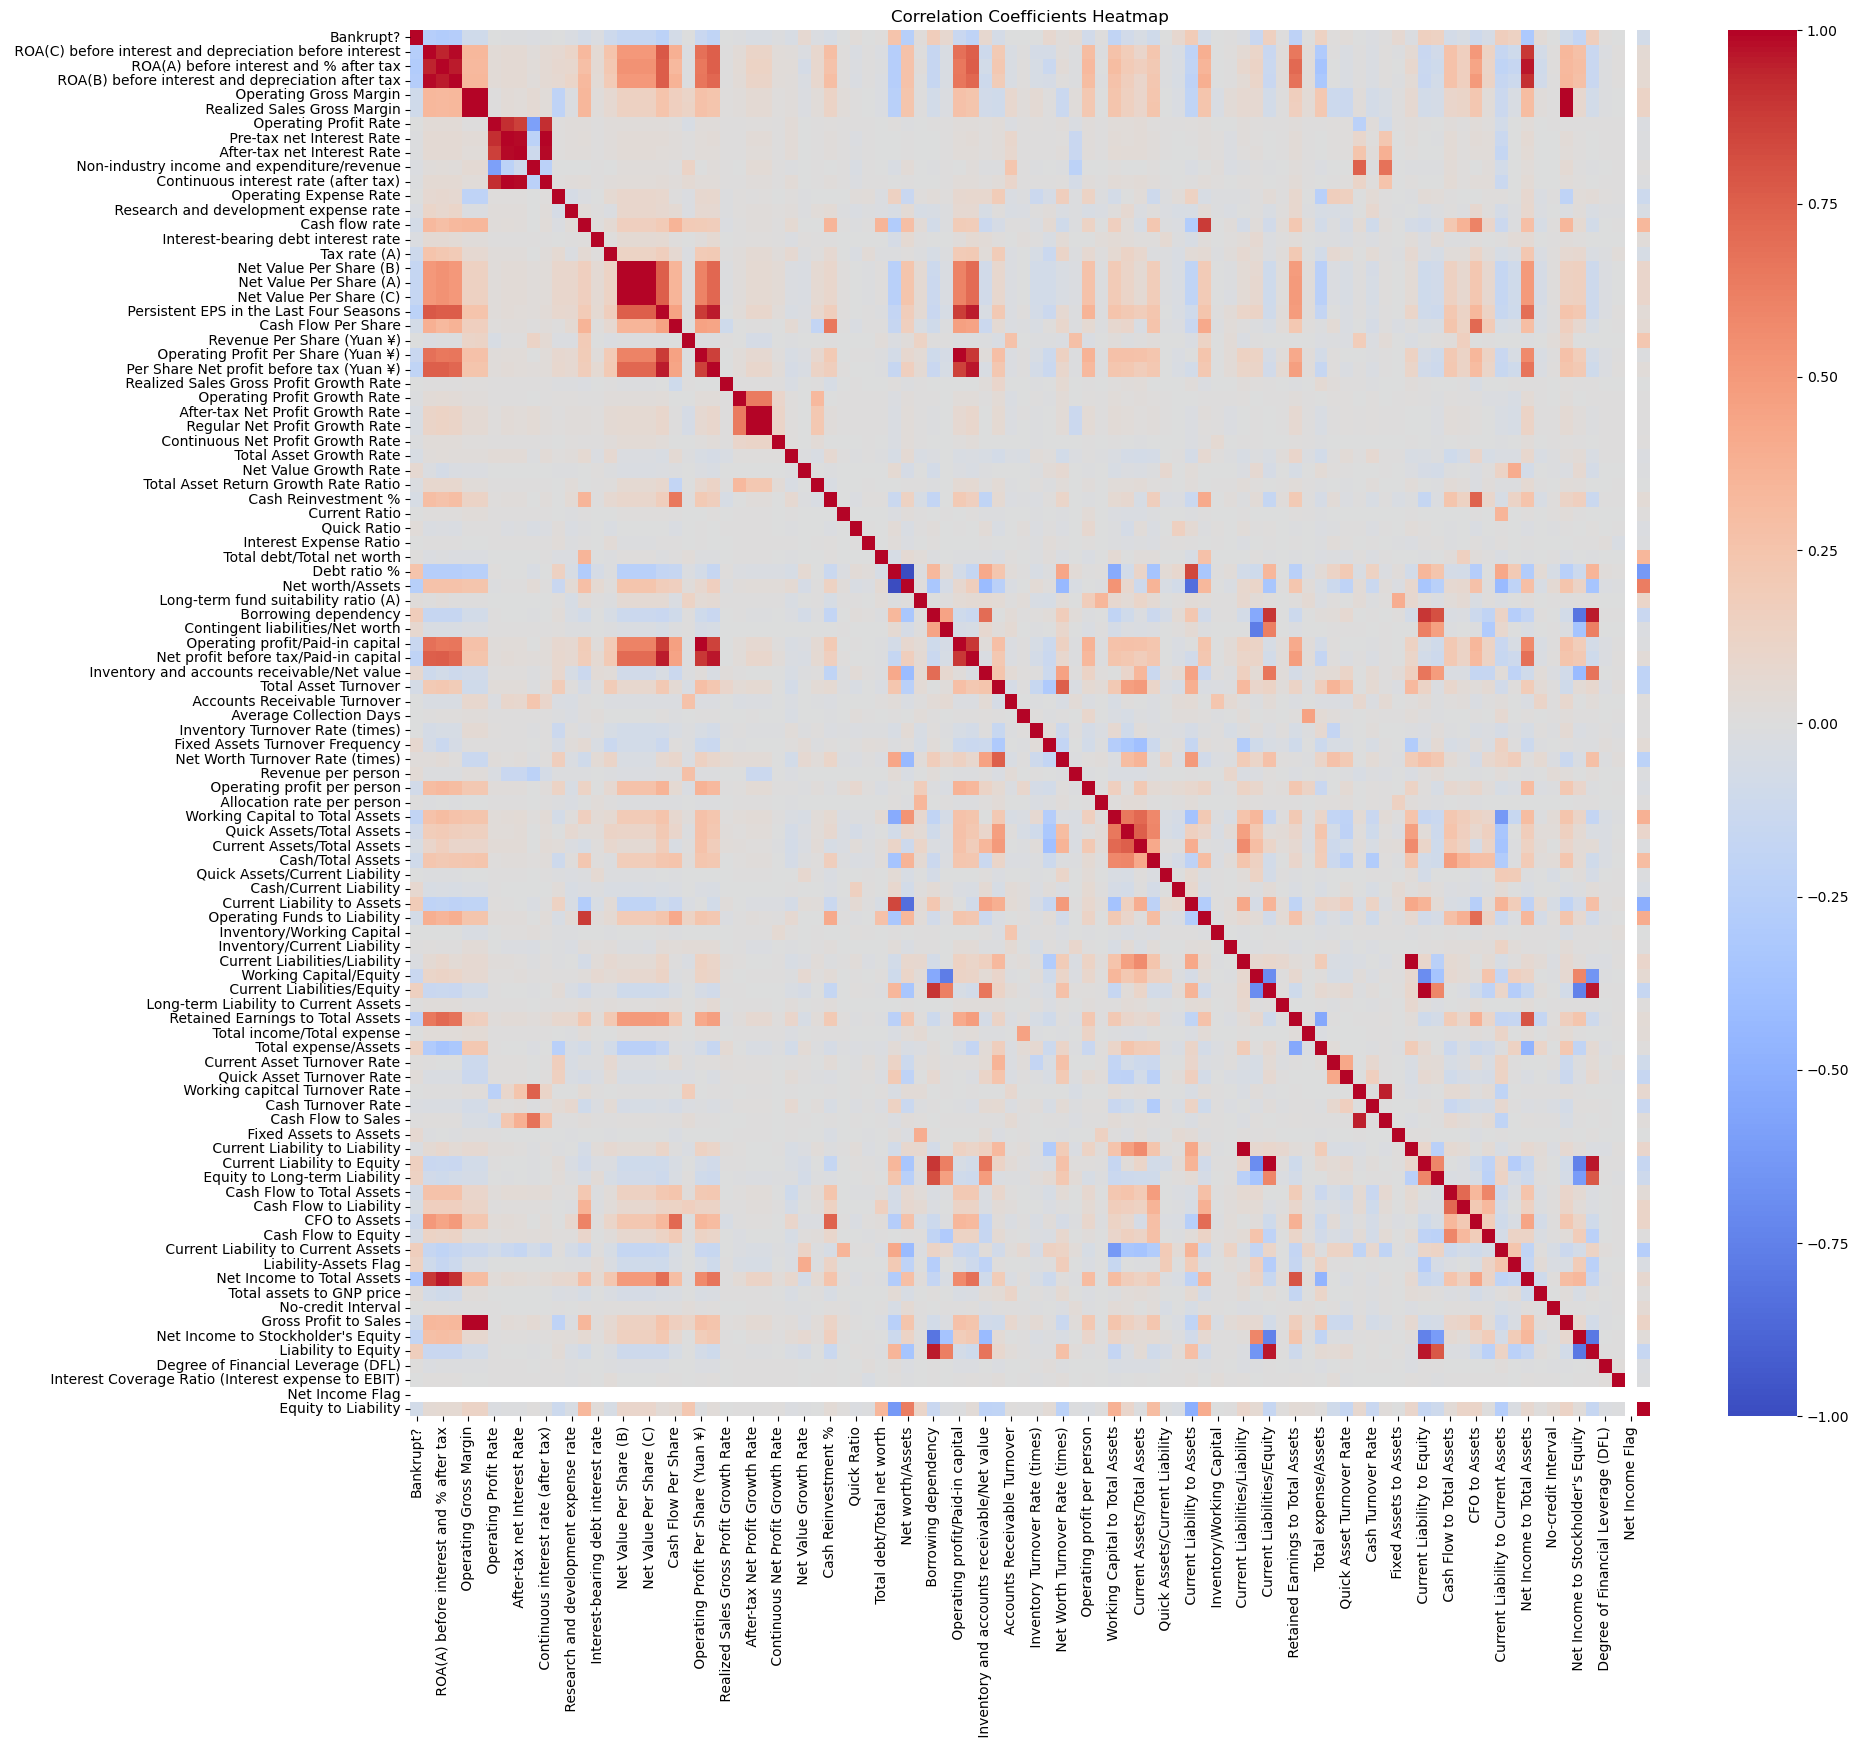

In [9]:
#since there are 96 variables in the dataset, we have to select only a few to keep our model simple. The selection can be done by caconsidering correlation of each variable with the targeted variable. 

correlation_coeff = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation_coeff, annot = False, cmap = "coolwarm" )
plt.title("Correlation Coefficients Heatmap")
plt.show()

In [34]:
correlation_coeff["Bankrupt?"].sort_values(ascending=False)


Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [11]:
#selecting only few variables for the study.

df1 = df[["Bankrupt?", " Net Income to Total Assets", " Interest Coverage Ratio (Interest expense to EBIT)",
         " Cash Flow to Liability", " Retained Earnings to Total Assets", " Total Asset Growth Rate", 
         " Operating Profit Rate", " Cash flow rate", " After-tax net Interest Rate", " Operating Profit Per Share (Yuan ¥)",
         " Operating Expense Rate", " Cash Flow to Sales", " Cash Reinvestment %", " Cash Flow Per Share", 
         " CFO to Assets", " Cash/Current Liability"]]

In [12]:
#checking the datatype of each variable
df1.dtypes

Bankrupt?                                                int64
 Net Income to Total Assets                            float64
 Interest Coverage Ratio (Interest expense to EBIT)    float64
 Cash Flow to Liability                                float64
 Retained Earnings to Total Assets                     float64
 Total Asset Growth Rate                               float64
 Operating Profit Rate                                 float64
 Cash flow rate                                        float64
 After-tax net Interest Rate                           float64
 Operating Profit Per Share (Yuan ¥)                   float64
 Operating Expense Rate                                float64
 Cash Flow to Sales                                    float64
 Cash Reinvestment %                                   float64
 Cash Flow Per Share                                   float64
 CFO to Assets                                         float64
 Cash/Current Liability                                

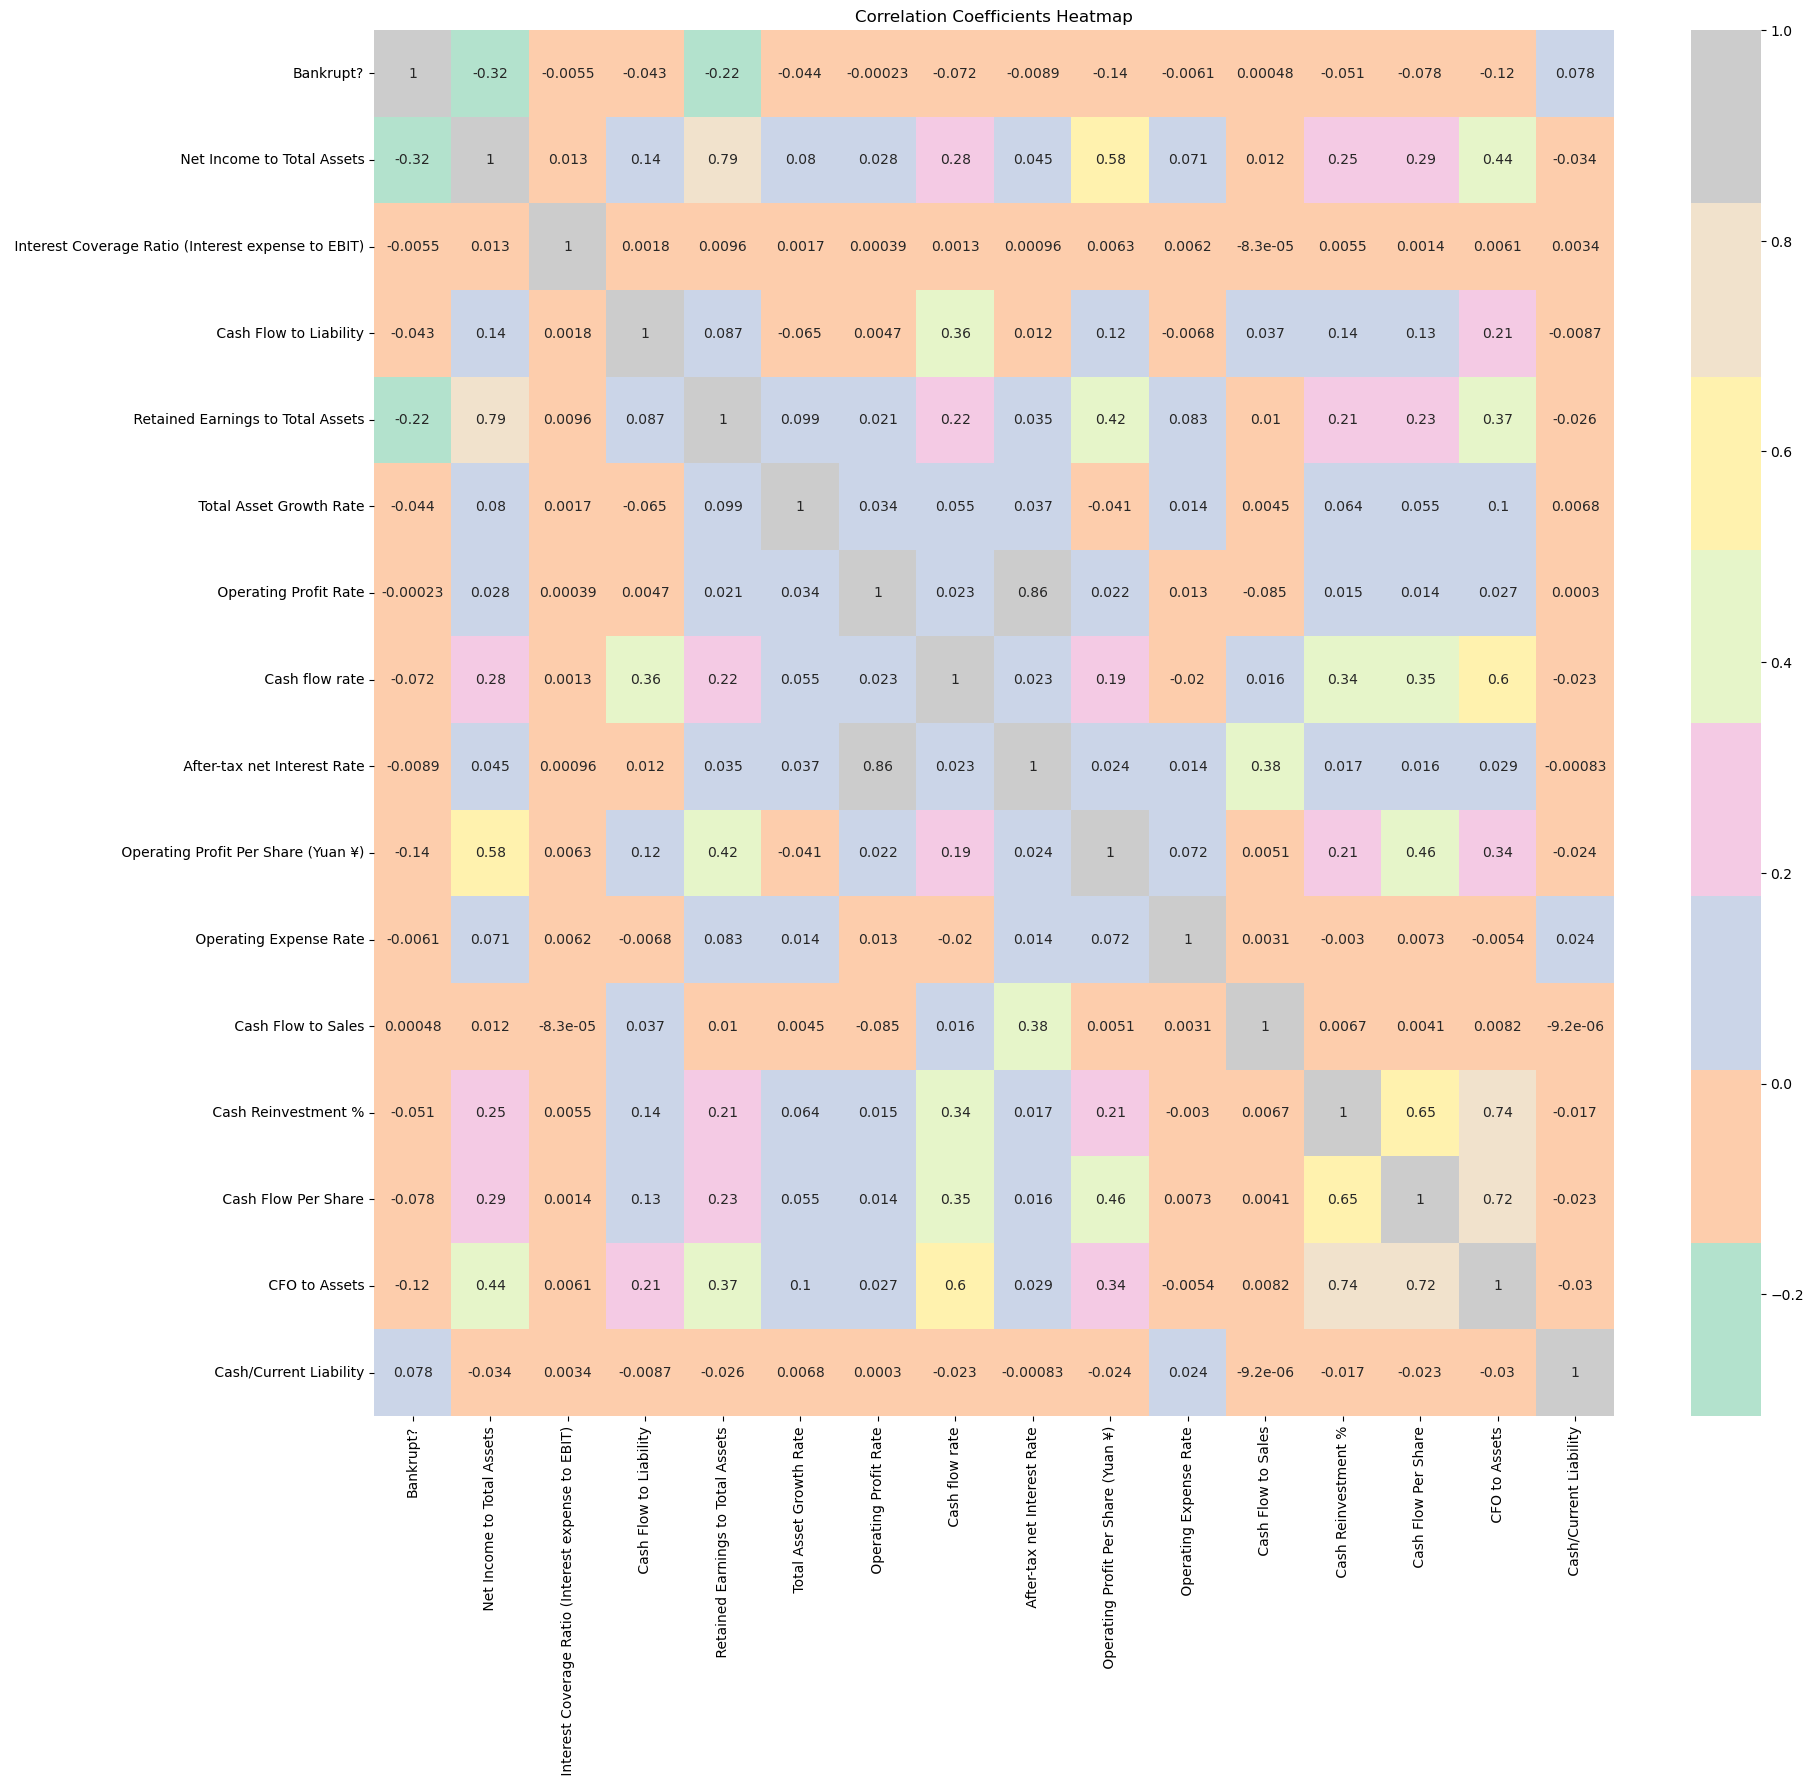

In [13]:
#heatmap of the new dataframe

new_correlation_coeff = df1.corr()
plt.figure(figsize=(20,18))
sns.heatmap(new_correlation_coeff, cbar = True, annot = True, cmap = "Pastel2" )
plt.title("Correlation Coefficients Heatmap")
plt.show()

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' Net Income to Total Assets'}>,
        <AxesSubplot:title={'center':' Interest Coverage Ratio (Interest expense to EBIT)'}>,
        <AxesSubplot:title={'center':' Cash Flow to Liability'}>],
       [<AxesSubplot:title={'center':' Retained Earnings to Total Assets'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Cash flow rate'}>],
       [<AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Operating Profit Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Cash Flow to Sales'}>],
       [<AxesSubplot:title={'center':' Cash Reinvestment %'}>,
        <AxesSubplot:title={'center':' Cash Flow Per Share'}>,
        <AxesSubplot:title={'center':' CFO t

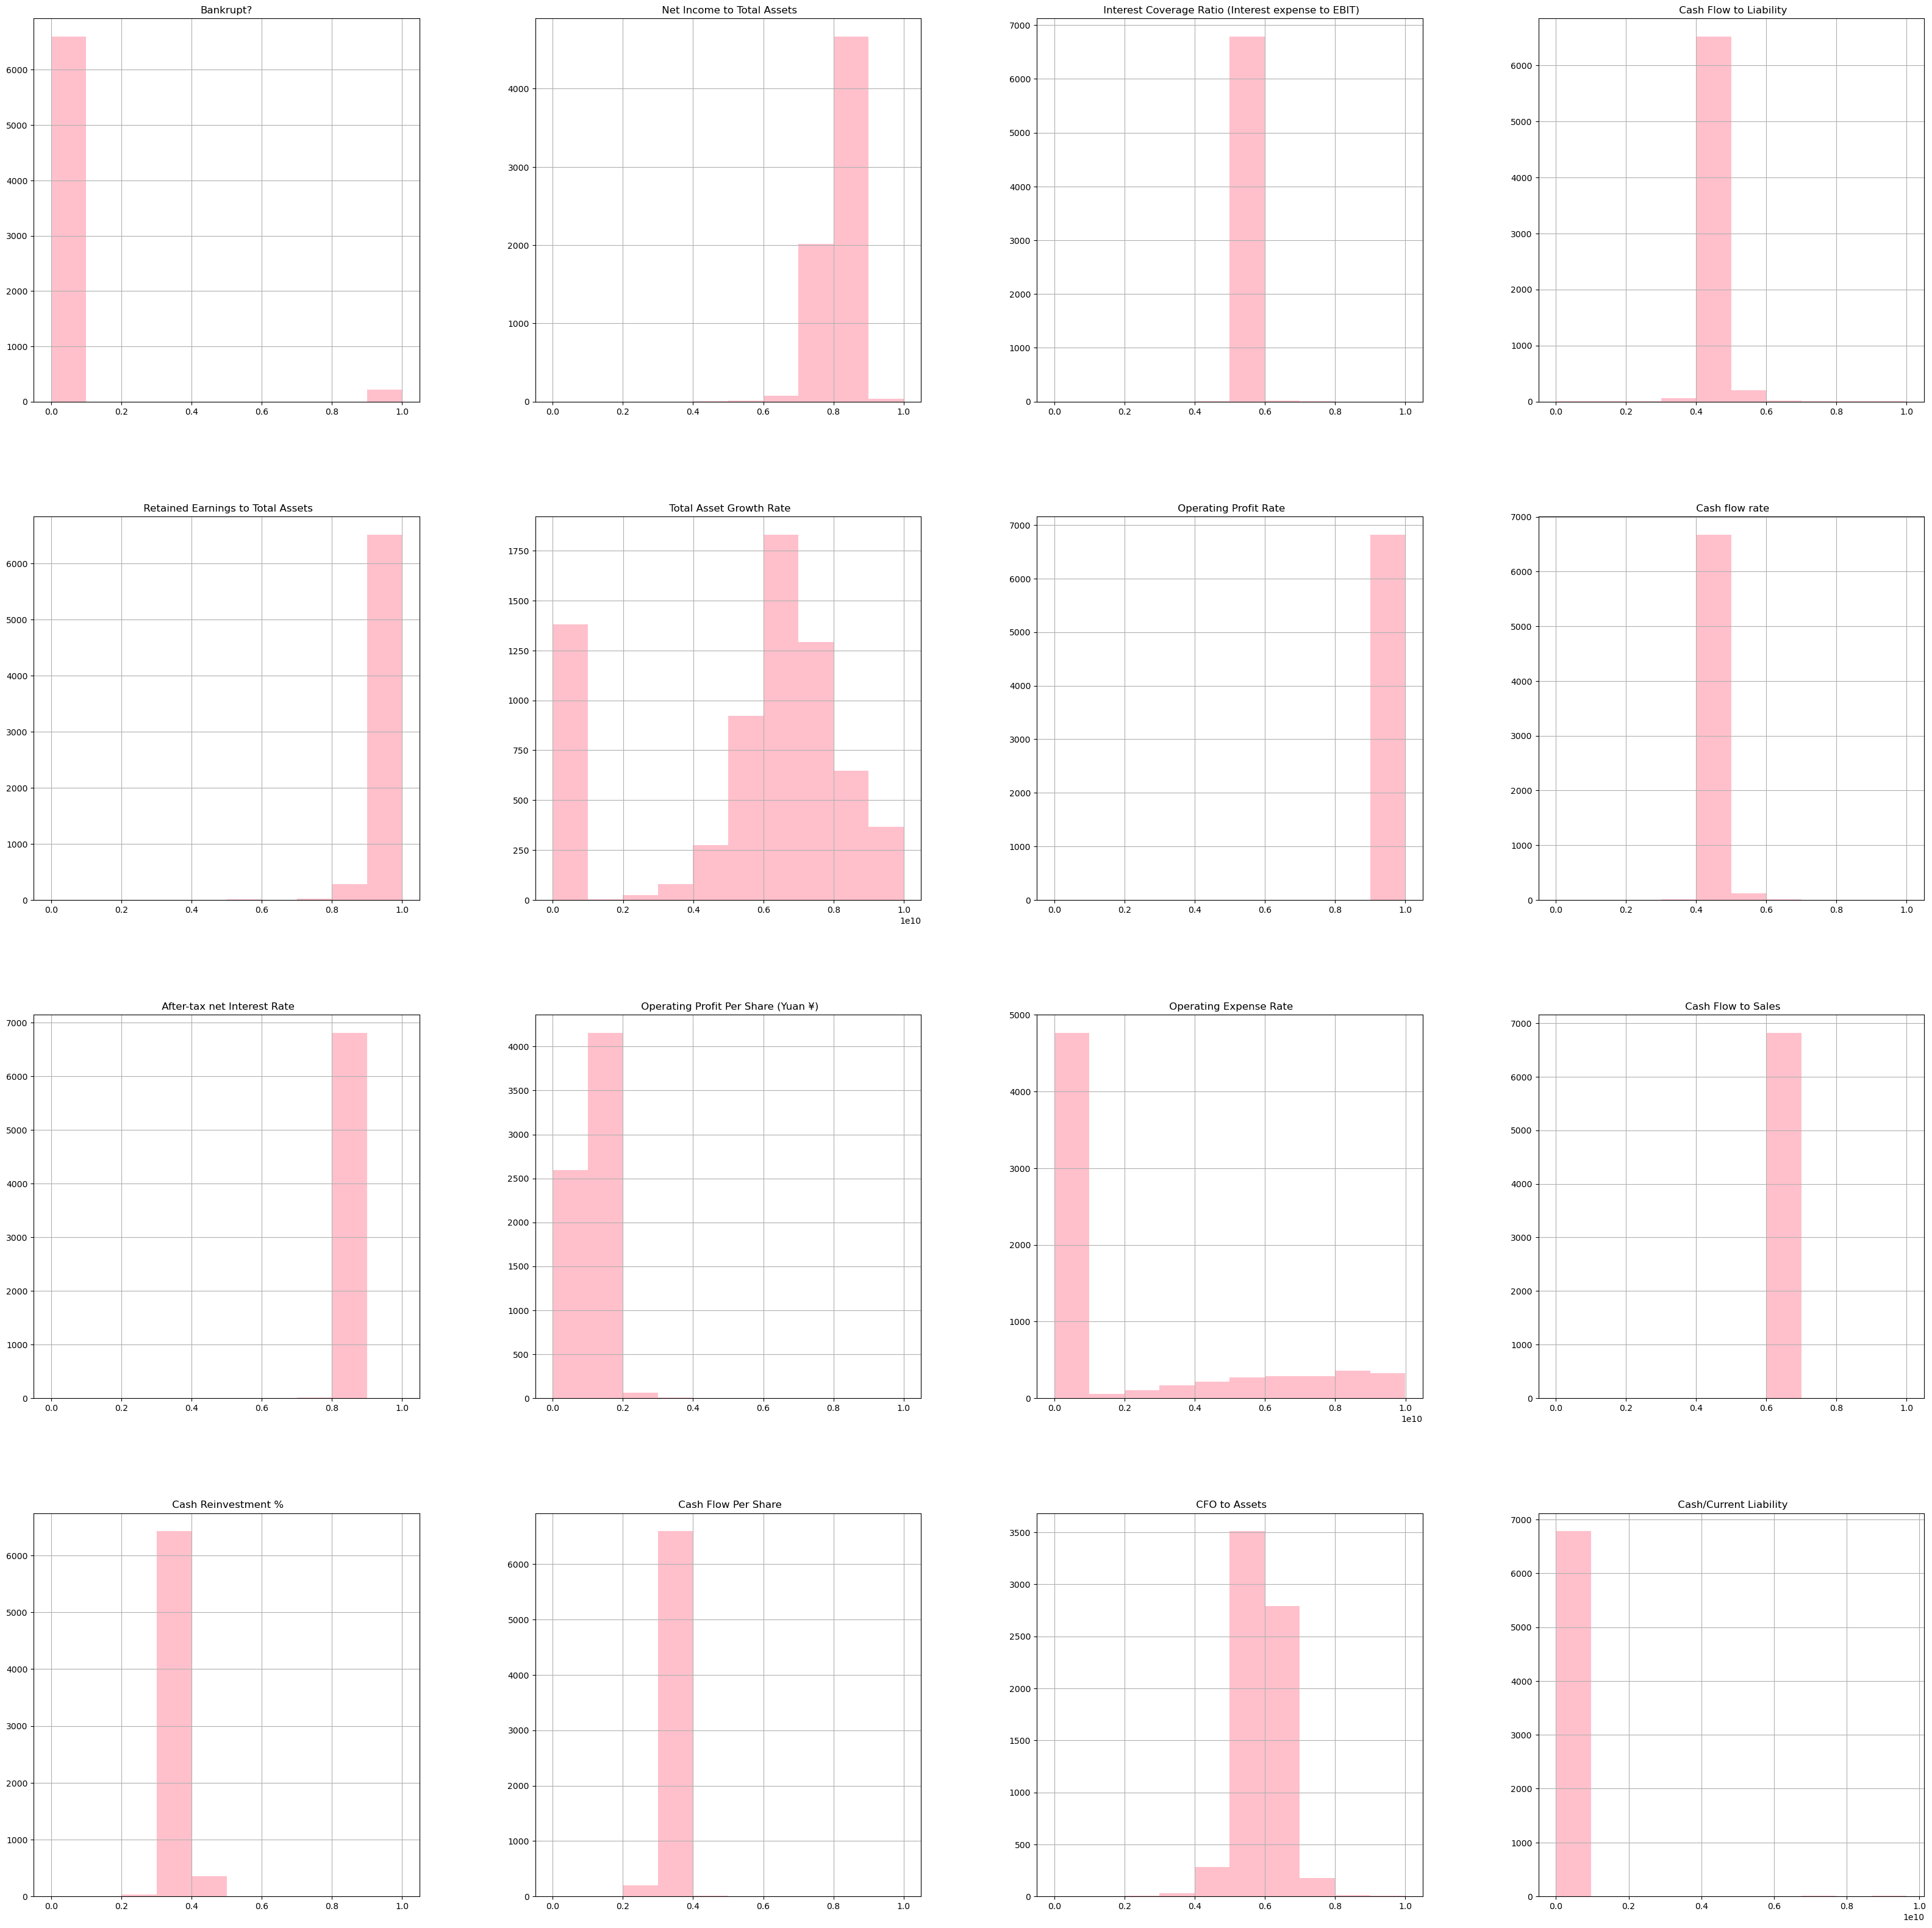

In [14]:
#checking distribution of all the variables

df1.hist(figsize = (40, 40), color = "pink")

Text(0.5, 1.0, 'Relationship between bankrupt events and Net income to total assets')

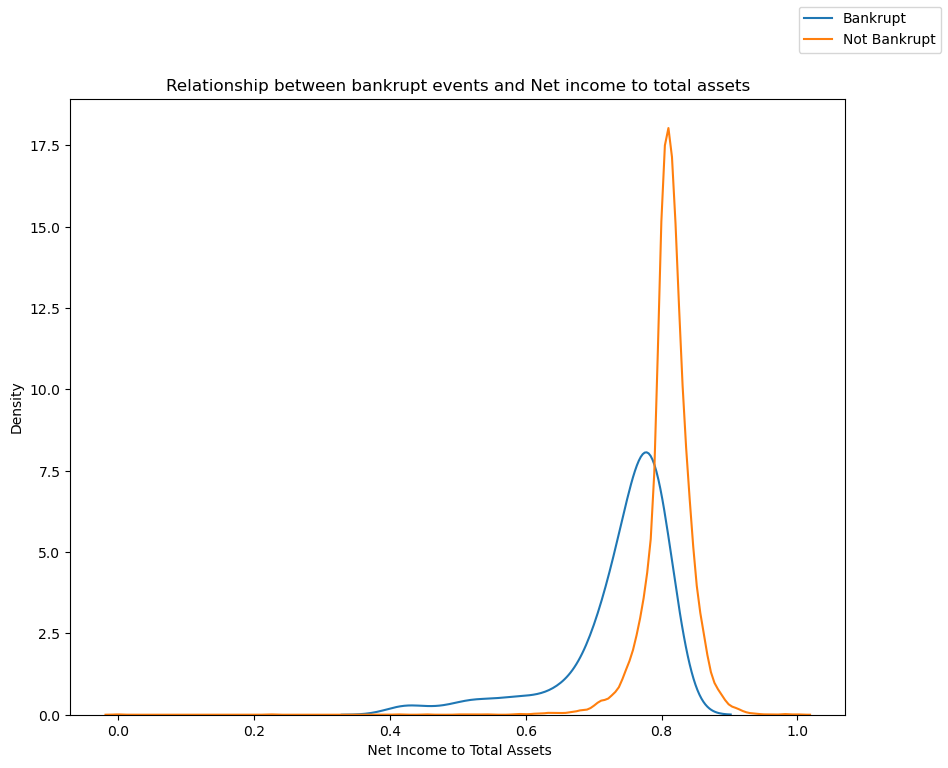

In [15]:
#observing relationship of each relevent variabke with bankruptcy
#Relationship of bankruptcy with Net Income to Total Assets

fig = plt.figure(figsize = (10,8))  #dimensions of the figure

#plotting Kernel Density Estimate(KSE) to visualize the prob density of each continuous variable
sns.kdeplot(df[df['Bankrupt?']==1][' Net Income to Total Assets'])     #1 equals bankruptcy
sns.kdeplot(df[df['Bankrupt?']==0][' Net Income to Total Assets'])      #0 equals not bankrupt

fig.legend(labels=['Bankrupt', 'Not Bankrupt'])  #A legend explains the meaning of each various elements in the plot. 
plt.title('Relationship between bankrupt events and Net income to total assets')

Text(0.5, 1.0, 'Relationship between bankrupt events and Retained Earnings to Total Assets')

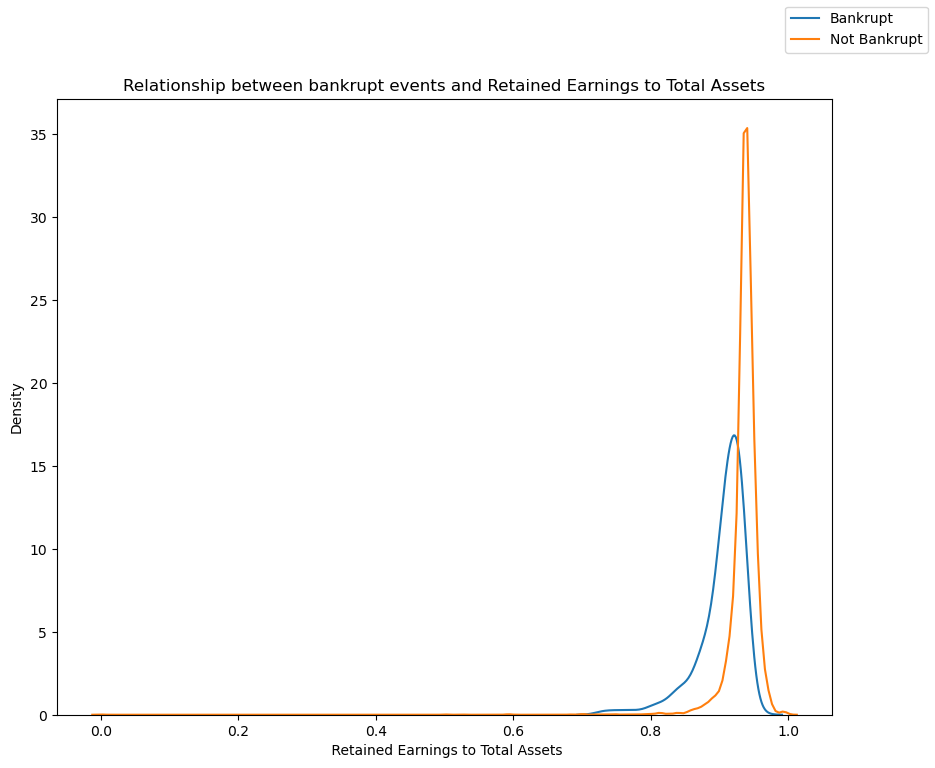

In [16]:
#Relationship of bankruptcy with Retained Earnings to Total Assets

fig = plt.figure(figsize = (10,8))  #dimensions of the figure

#plotting Kernel Density Estimate(KSE) to visualize the prob density of each continuous variable
sns.kdeplot(df[df['Bankrupt?']==1][' Retained Earnings to Total Assets'])   #1 equals bankruptcy
sns.kdeplot(df[df['Bankrupt?']==0][' Retained Earnings to Total Assets'])   #0 equals not bankrupt

fig.legend(labels=['Bankrupt', 'Not Bankrupt'])  #A legend explains the meaning of each various elements in the plot. 
plt.title('Relationship between bankrupt events and Retained Earnings to Total Assets')

Text(0.5, 1.0, 'Relationship between bankrupt events with Total Asset Growth Rate')

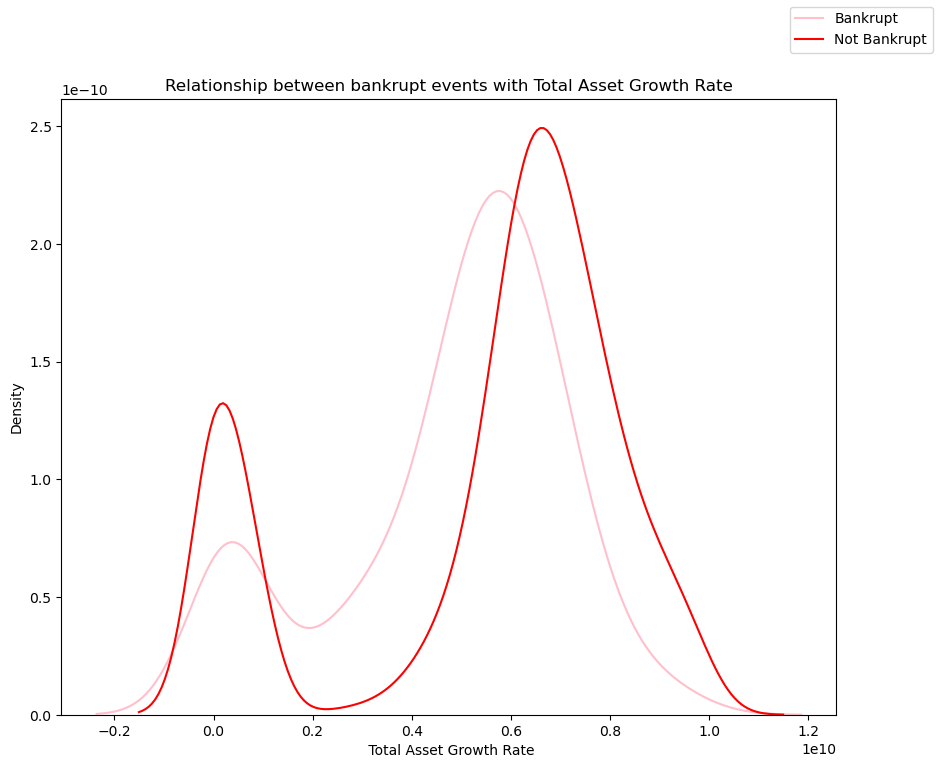

In [17]:
#Relationship of bankruptcy with Total Asset Growth Rate

fig = plt.figure(figsize = (10,8))  #dimensions of the figure

#plotting Kernel Density Estimate(KSE) to visualize the prob density of each continuous variable
sns.kdeplot(df[df['Bankrupt?']==1][' Total Asset Growth Rate'], color = "pink")   #1 equals bankruptcy
sns.kdeplot(df[df['Bankrupt?']==0][' Total Asset Growth Rate'], color = "red")   #0 equals not bankrupt

fig.legend(labels=['Bankrupt', 'Not Bankrupt'])  #A legend explains the meaning of each various elements in the plot. 
plt.title('Relationship between bankrupt events with Total Asset Growth Rate')

In [18]:
#Setting X and Y variables

X = df1.drop(columns = "Bankrupt?")
Y = df1["Bankrupt?"]

In [19]:
#Spliting the data into train set and test set
!pip install imbalanced-learn
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)


In [21]:
df1["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [22]:
#Here we can see that the the number of bankrupt companies are very less than the non-bankrupt companies. The data set is highly imbalanced. 
#Therefore we use SMOTE technique ton balance out the dataset.
#SMOTE creates synthetic examples by considering the neighbors of each example in the minority class. 
#It selects an example and its k nearest neighbors, then generates new examples along the line segments connecting them.

In [23]:
print("Before SMOTE - X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)


Before SMOTE - X_train shape: (5114, 15) Y_train shape: (5114,)


In [24]:
smote = SMOTE(random_state=1)
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)


In [25]:
print("After SMOTE - X_train_resampled shape:", X_train.shape, "Y_train_resampled shape:", Y_train.shape)

After SMOTE - X_train_resampled shape: (9910, 15) Y_train_resampled shape: (9910,)


In [26]:
#Standardizing the features in training set and test set.
#The purpose of standardization is to ensure that features have comparable scales
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)
print("Standarzied train set of X variable:", X_train)
print("Standarzied test set of X variable:", X_test)

Standarzied train set of X variable:        Net Income to Total Assets  \
0                        0.660931   
1                       -0.324860   
2                       -0.012262   
3                        1.247601   
4                        0.113338   
...                           ...   
9905                     0.138260   
9906                    -0.146725   
9907                    -0.252468   
9908                    -1.125551   
9909                     0.452579   

       Interest Coverage Ratio (Interest expense to EBIT)  \
0                                              0.162421     
1                                             -0.032207     
2                                              0.004791     
3                                              0.032377     
4                                             -0.048533     
...                                                 ...     
9905                                          -0.681323     
9906                          

In [35]:
#Decision Tree
#Decision trees are a type of machine learning model that makes predictions by recursively splitting the data into subsets based on the values of input features

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics


model= tree.DecisionTreeClassifier(random_state=1)    #creating an instance of the DecisionTreeClassifier class.
model.fit(X_train, Y_train)                           #training the model on training data
pred = model.predict(X_test)                         #predicting using training data
cm = confusion_matrix(Y_test, pred)                   #calculating confusion matrix based on true class labels and predicted class labels
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))


Train set Accuracy:  1.0
Test set Accuracy:  0.6674486803519062


In [ ]:
#Interpretation:
#Train set accuracy is 1 implies that the model correctly predicted all instances in the training dataset. It achieved a perfect accuracy of 100% on the data it was trained on.
#Test set accuracy is 92.14% implies: This means that the model correctly predicted approximately 92.14% of the instances in the testing dataset
#t performed well on new, unseen data, but not as perfectly as on the training data.
#The test set accuracy is usually a more reliable indicator of how well the model will perform on new data compared to the training set accuracy.


#To gain more comprehensive understanding of the model, we will check F-1 score


<AxesSubplot:>

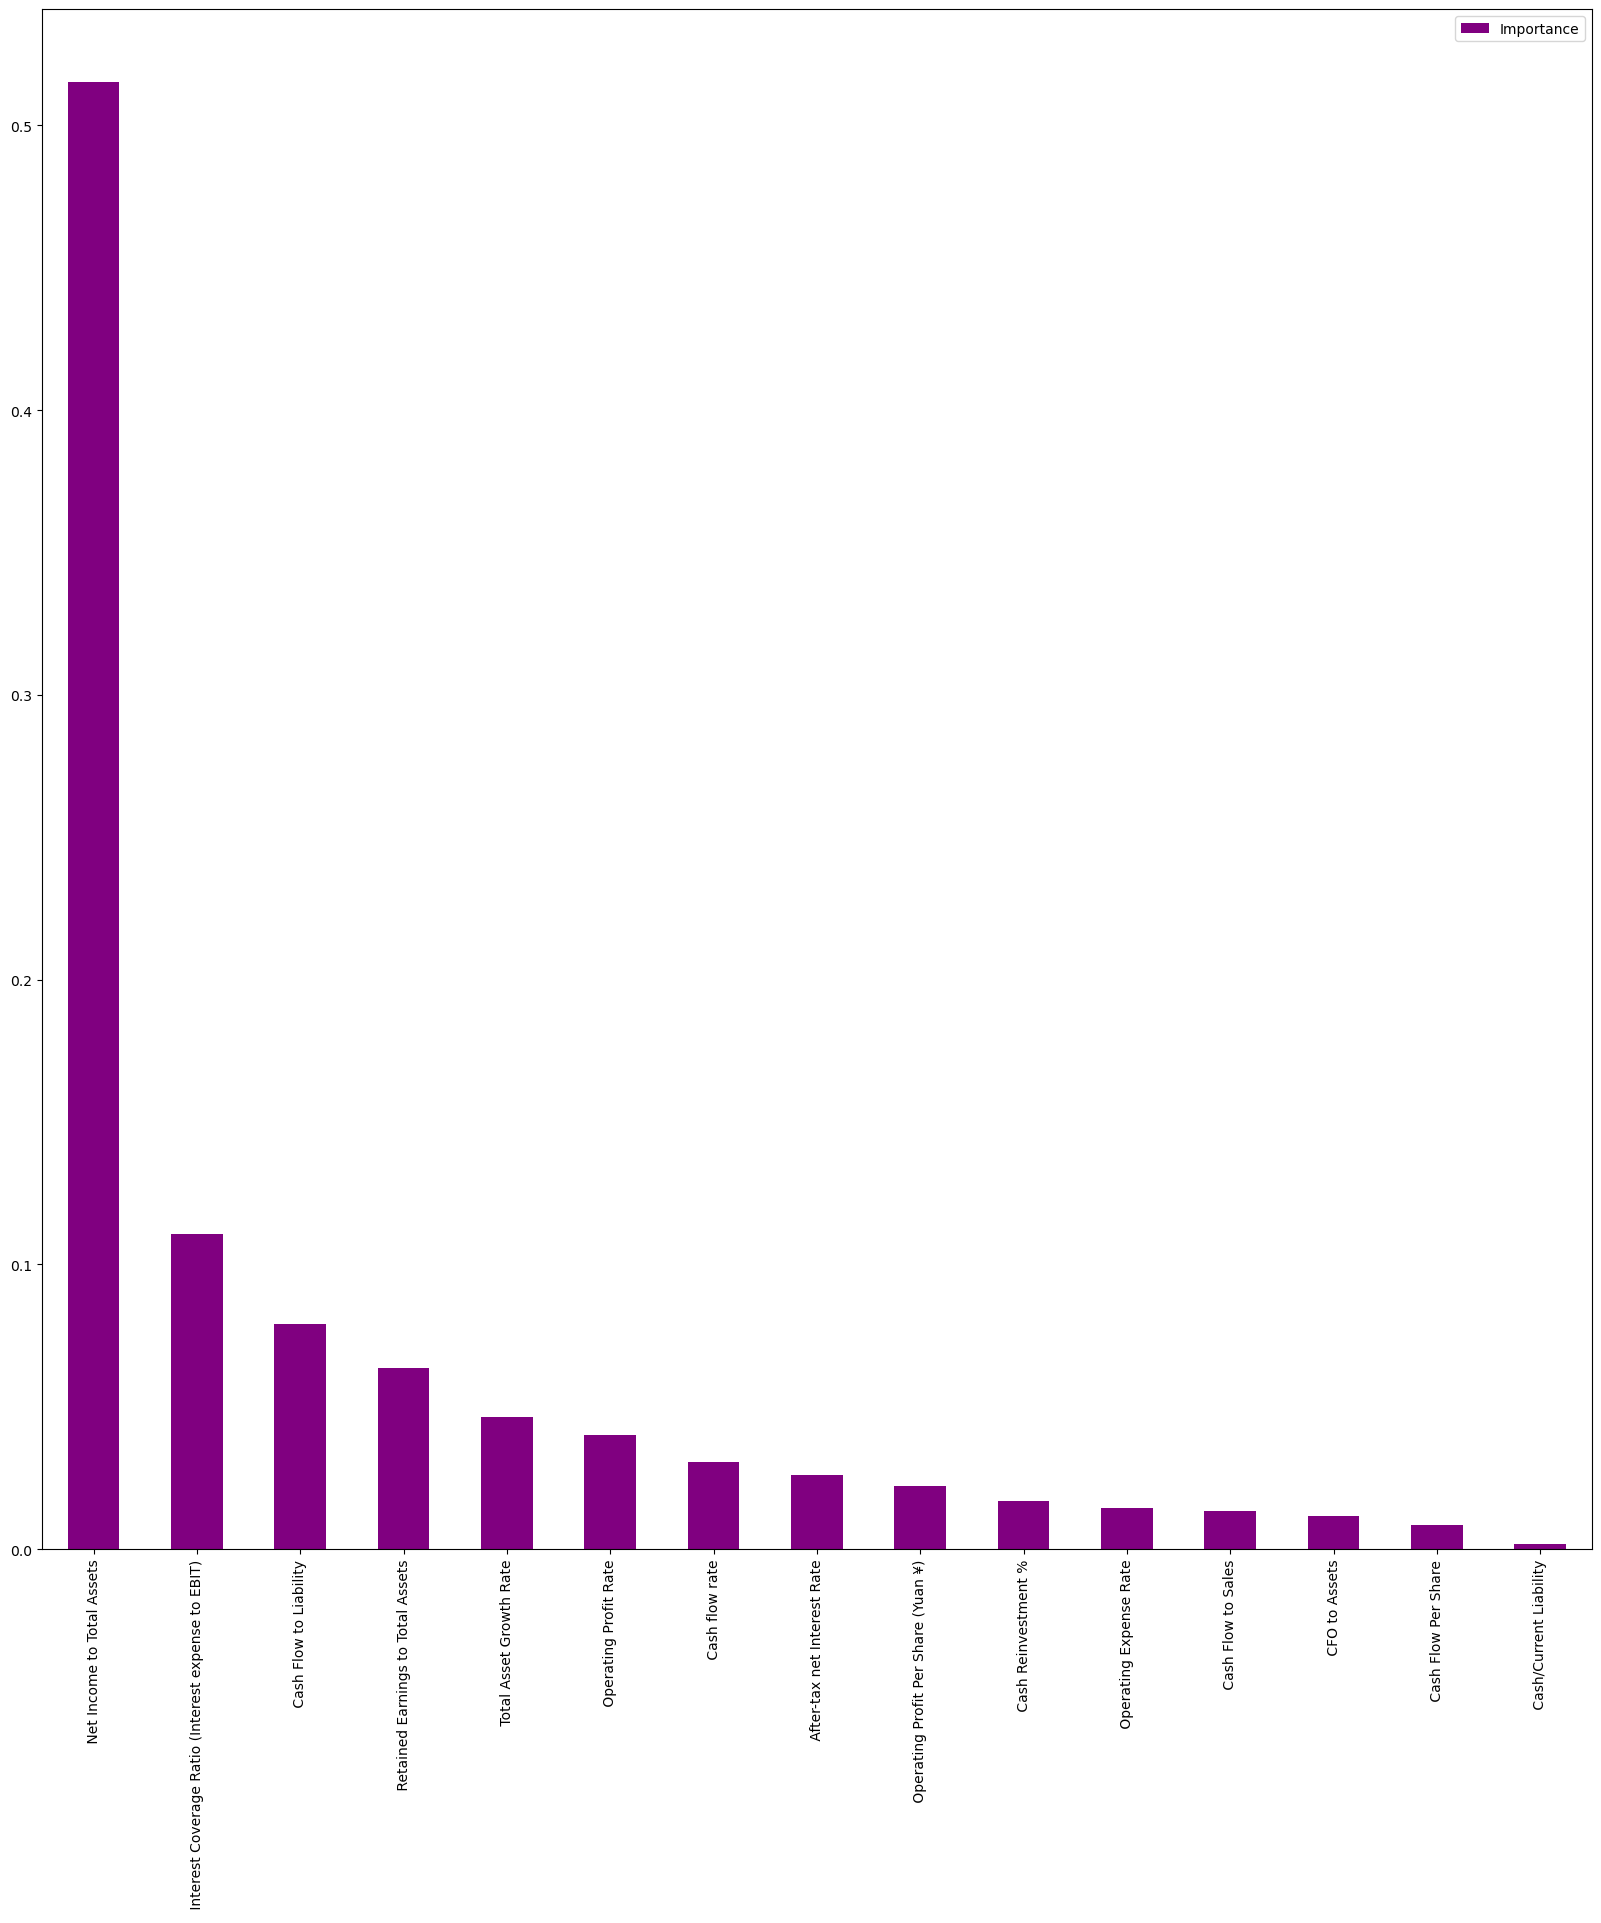

In [36]:
#Feature importance of variables

#creating new dataframewhich contains importances of features of variables from the model
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])

#sorting the importance from high to low
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

#plotting the graph
feat_importances.plot(kind='bar', figsize=(20,20), color ="purple")

In [ ]:
pip install scikit-plot 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

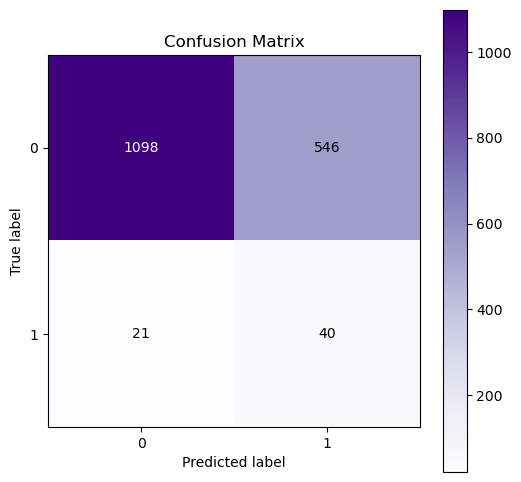

In [37]:
#Confusion matrix for DECISION TREE


skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(6,6), cmap = "Purples")

In [ ]:
#Here, we can see that that 1550 variables are true positive, ie The number of instances that were correctly predicted as positive by the model.
#The no. of False Negative are 94, ie 94 instances that were actually positive but were incorrectly predicted as negative by the model.


In [39]:
#RANDOM FOREST

#Creating random forest class
model = ensemble.RandomForestClassifier(random_state = 1)    #Creating random forest class

#training the model on train data
model.fit(X_train, Y_train)

#making predictions using trained model
pred = model.predict(X_test)

#Calculating confusion matrix
cm = confusion_matrix(Y_test, pred)

#Testing the accuracy of the score 
print("Train set accuracy:", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(Y_test, pred))

Train set accuracy: 1.0
Test set accuracy: 0.6287390029325514


In [ ]:
#Here we can see that the accuracy of the predicted model is significant high. This model is reliable. 


In [ ]:
#Feature importance of variables

#creating new dataframewhich contains importances of features of variables from the model
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])

#sorting the importance from high to low
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

#plotting the graph
feat_importances.plot(kind='bar', figsize=(8, 6), color ="red")

In [ ]:
#Confusion matrix for DECISION TREE


skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(6,6), cmap = "rainbow")